**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( B )

---


Analista de dados:
* William Teixeira Pires Junior

---

In [29]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy
from itertools import combinations
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [3]:
colNames = ["ID", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion", 
            "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "Class"]
data = pandas.read_csv('breast-cancer-wisconsin.csv', names=colNames, na_values='?')
print(' Número de linhas: ', len(data))
print('Número de colunas: ', len(data.columns))
data.head()

 Número de linhas:  699
Número de colunas:  11


,ID,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
data = data.drop(['ID'], axis=1)

<AxesSubplot:>

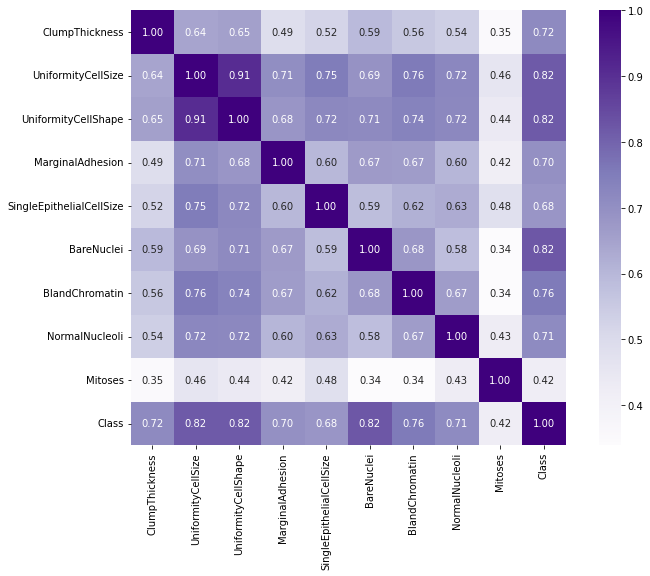

In [26]:
plt.figure(figsize=(12,8))
correlated=data.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Purples',annot_kws={'size':10},fmt='.2f')

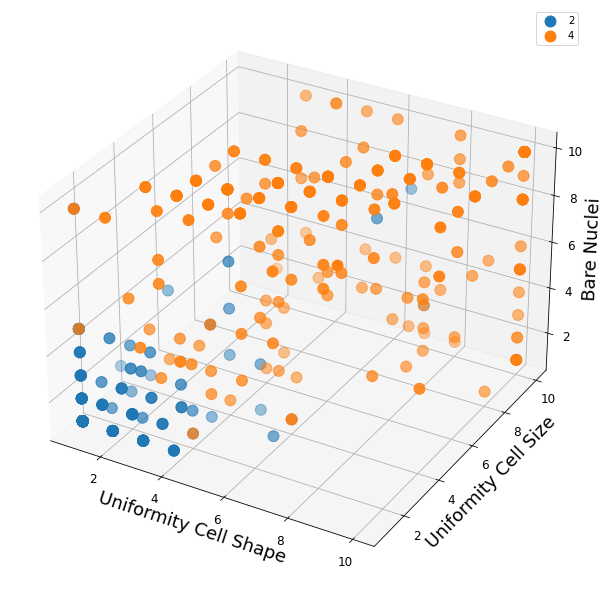

In [25]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for grpName, grpIdx in data.groupby('Class').groups.items():
    x = data.iloc[grpIdx, 2]
    y = data.iloc[grpIdx, 1]
    z = data.iloc[grpIdx, 5]
    ax.scatter(x, y, z, label=grpName, s=120)
    
ax.set_xlabel('Uniformity Cell Shape', fontsize=18)
ax.set_ylabel('Uniformity Cell Size', fontsize=18)
ax.set_zlabel('Bare Nuclei', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

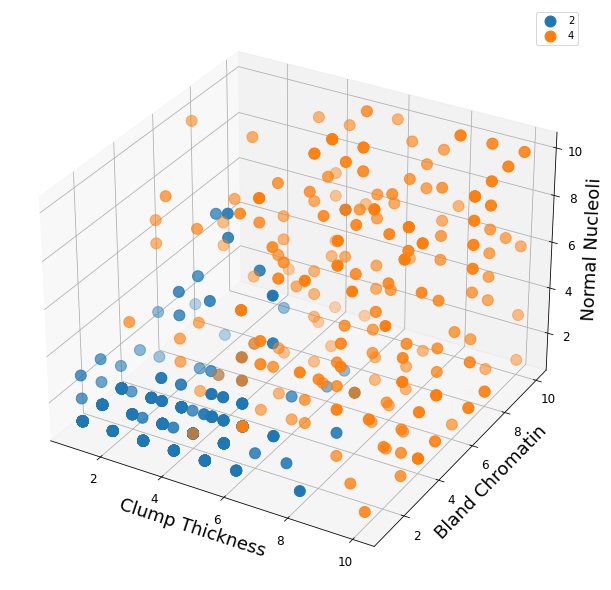

In [24]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for grpName, grpIdx in data.groupby('Class').groups.items():
    x = data.iloc[grpIdx, 0]
    y = data.iloc[grpIdx, 6]
    z = data.iloc[grpIdx, 7]
    ax.scatter(x, y, z, label=grpName, s=120)

ax.set_xlabel('Clump Thickness', fontsize=18)
ax.set_ylabel('Bland Chromatin', fontsize=18)
ax.set_zlabel('Normal Nucleoli', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

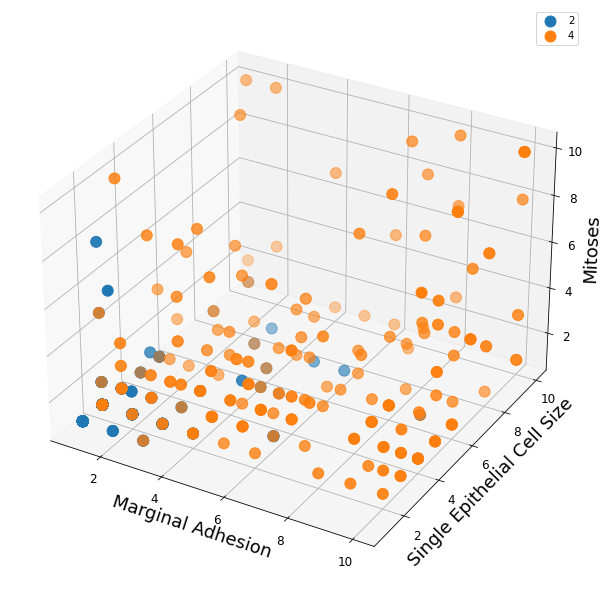

In [23]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for grpName, grpIdx in data.groupby('Class').groups.items():
    x = data.iloc[grpIdx, 3]
    y = data.iloc[grpIdx, 4]
    z = data.iloc[grpIdx, 8]
    ax.scatter(x, y, z, label=grpName, s=120)

ax.set_xlabel('Marginal Adhesion', fontsize=18)
ax.set_ylabel('Single Epithelial Cell Size', fontsize=18)
ax.set_zlabel('Mitoses', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

In [21]:
col = colNames[1:]
page = 1
with PdfPages('scatter_plots.pdf') as pdf:
    for x, y, z in combinations(range(0, 8), 3):
        fig = plt.figure(figsize=(15,10))
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

        for grpName, grpIdx in data.groupby('Class').groups.items():
            xd = data.iloc[grpIdx, x]
            yd = data.iloc[grpIdx, y]
            zd = data.iloc[grpIdx, z]
            ax.scatter(xd, yd, zd, label=grpName, s=120)

        xl = col[x]
        yl = col[y]
        zl = col[z]
        ax.set_xlabel(xl, fontsize=18)
        ax.set_ylabel(yl, fontsize=18)
        ax.set_zlabel(zl, fontsize=18)
        ax.tick_params(axis='both', labelsize=12)
        ax.set_title('Scatter Plot - Page {}'.format(page))
        ax.legend()
        page += 1
        plt.savefig(pdf, format='pdf')
        plt.close()



In [37]:
imputer = MissForest()
dataForImputation = data.drop('Class', axis=1)
imputedData = imputer.fit_transform(dataForImputation)

C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0
Iteration: 1
Iteration: 2


C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [54]:
imputedDataframe = pandas.DataFrame(imputedData, columns=colNames[1:10])
imputedDataframe['Class'] = data['Class']
imputedDataframe['BareNuclei'].value_counts()

,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2


In [53]:
for col in colNames[1:10]:
    imputedDataframe[col] = imputedDataframe[col].apply(lambda x: round(x))
imputedDataframe.head()


,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
